# Эксперимент Майкельсона

Данные классического эксперимента Майкельсона по измерению скорости света с помощью вращающегося зеркала, 100 наблюдений:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
speed = np.genfromtxt('speed.txt')
speed

array([299850., 299740., 299900., 300070., 299930., 299850., 299950.,
       299980., 299980., 299880., 300000., 299980., 299930., 299650.,
       299760., 299810., 300000., 300000., 299960., 299960., 299960.,
       299940., 299960., 299940., 299880., 299800., 299850., 299880.,
       299900., 299840., 299830., 299790., 299810., 299880., 299880.,
       299830., 299800., 299790., 299760., 299800., 299880., 299880.,
       299880., 299860., 299720., 299720., 299620., 299860., 299970.,
       299950., 299880., 299910., 299850., 299870., 299840., 299840.,
       299850., 299840., 299840., 299840., 299890., 299810., 299810.,
       299820., 299800., 299770., 299760., 299740., 299750., 299760.,
       299910., 299920., 299890., 299860., 299880., 299720., 299840.,
       299850., 299850., 299780., 299890., 299840., 299780., 299810.,
       299760., 299810., 299790., 299810., 299820., 299850., 299870.,
       299870., 299810., 299740., 299810., 299940., 299950., 299800.,
       299810., 2998

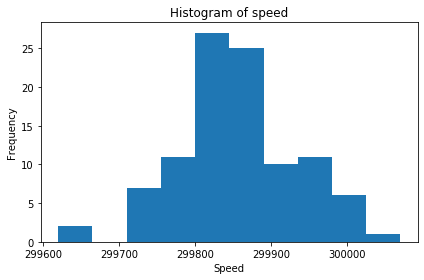

In [3]:
plt.hist(speed)
plt.title('Histogram of speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.tight_layout()

Можно ли считать наблюдения нормально распределёнными?

## Анализ данных

1. Постройте на одном графике оцененную при помощи ядрового метода сглаженную гистограмму (оценку плотности распределения), а также кривую плотности нормального распределения с параметрами, оцененным по выборке. (Вам помогут функции `gaussian_kde` и `norm.pdf`, из `scipy.stats`)

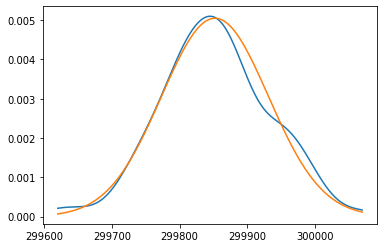

In [4]:
from scipy.stats import gaussian_kde, norm
import statistics
density = gaussian_kde(speed)
x = np.linspace(min(speed), max(speed), 300)
plt.plot(x, density(x))
plt.plot(x, norm.pdf(x, statistics.mean(speed), statistics.stdev(speed)))

2. Постройте на одном графике эмпирическую функцию распределения (emperical CDF), а также кривую функции распределения нормального распределения (CDF) с параметрами, оцененным по выборке. (Используйте `ECDF` из `statsmodels.api`)

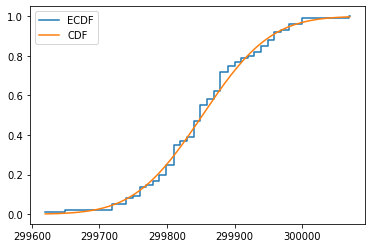

In [5]:
import statsmodels.api as sm 
ecdf = sm.distributions.ECDF(speed)
y = ecdf(x)
plt.step(x, y, label= 'ECDF')
plt.plot(x, norm.cdf(x, statistics.mean(speed), statistics.stdev(speed)), label= 'CDF')
plt.legend(loc='best')

3. Постройте Q-Q plot для данных. Похожи ли данные на нормальное распределение? (Вам поможет функция `qqplot` из `statsmodels`)

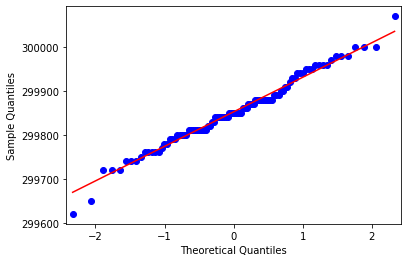

In [6]:
import statsmodels.api as sm
sm.qqplot(speed, line ='s')
plt.show()